understanding filter

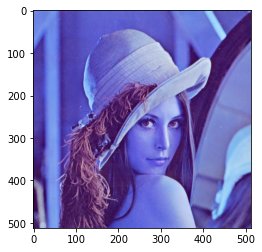

In [1]:
import cv2
from matplotlib import pyplot as plt
#Import image
image = cv2.imread(r"ch_0/lena.png") # this is read in BGR format
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)# this converts it into RGB
plt.imshow(image)


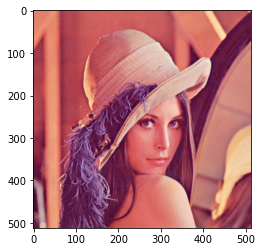

In [2]:
plt.imshow(rgb)

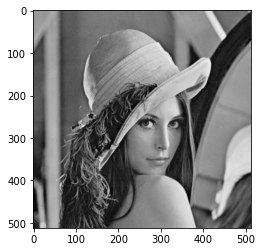

In [3]:
import numpy
import scipy
from scipy import ndimage

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)# this converts it into gray
plt.imshow(gray,cmap='gray')
# plt.show()

In [4]:
# im = scipy.misc.imread('bike.jpg')
im = gray.astype('int32')

dx = ndimage.sobel(im, 1)  # horizontal derivative
dy = ndimage.sobel(im, 0)  # vertical derivative
mag = numpy.hypot(dx, dy)  # magnitude
mag *= 255.0 / numpy.max(mag)  # normalize (Q&D)

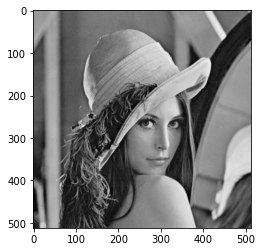

In [5]:
plt.imshow(im,'gray')

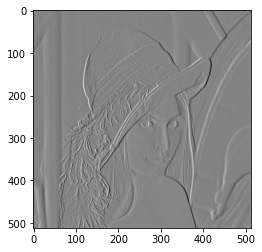

In [6]:
plt.imshow(dx,cmap='gray')

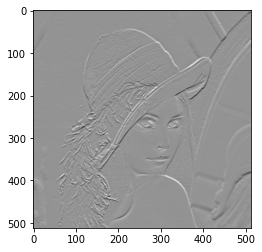

In [7]:
plt.imshow(dy,cmap='gray')
# plt.imshow(dy)

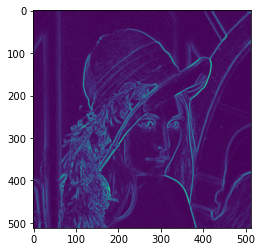

In [8]:
plt.imshow(mag)

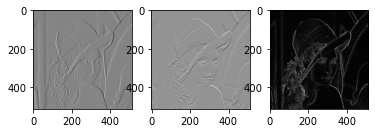

In [9]:
plt.subplot(1,3,1);plt.imshow(dx,'gray')
plt.subplot(1,3,2);plt.imshow(dy,'gray')
plt.subplot(1,3,3);plt.imshow(mag,'gray')

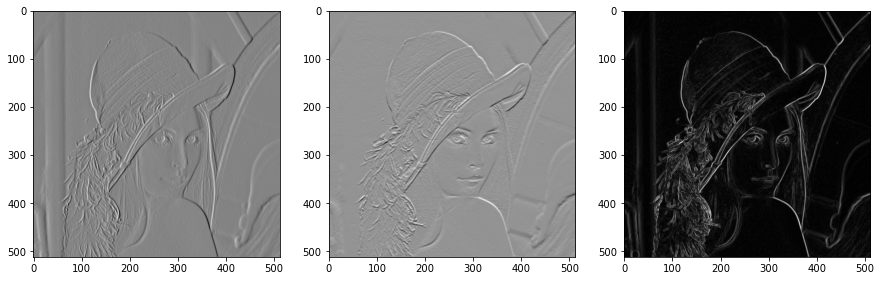

In [10]:
plt.figure(figsize=(15,15))
plt.subplot(1,3,1);plt.imshow(dx,'gray')
plt.subplot(1,3,2);plt.imshow(dy,'gray')
plt.subplot(1,3,3);plt.imshow(mag,'gray')

In [11]:
import numpy as np
print(np.max(mag))
print(np.min(mag))

255.0
0.0


In [12]:
print(np.max(dx))
print(np.min(dx))

640
-688


In [13]:
print(np.max(dy))
print(np.min(dy))

469
-644


In [14]:
from skimage import filters

edge=filters.sobel(gray)

print('min(img)=',np.min(gray))
print('min(edge)=',np.min(edge))
# print('min(n_img)=',np.min(n_img))


print('max(img)=',np.max(gray))
print('max(edge)=',np.max(edge))
# print('max(n_img)=',np.max(n_img))

min(img)= 25
min(edge)= 0.0
max(img)= 245
max(edge)= 0.49155986758660525


In [15]:
def myDisplayCmap(x,y):
    plt.subplot(1,2,1),plt.imshow(x,cmap='gray')
    plt.subplot(1,2,2),plt.imshow(y,cmap='gray')

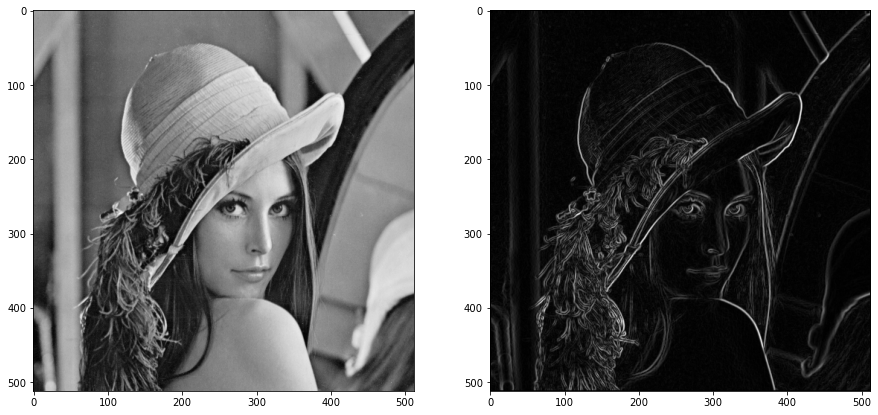

In [16]:
plt.figure(figsize=(15,15))
myDisplayCmap(gray,edge)

In [17]:
value1=edge.copy()


In [18]:
print(np.max(edge))
print(np.min(edge))

0.49155986758660525
0.0


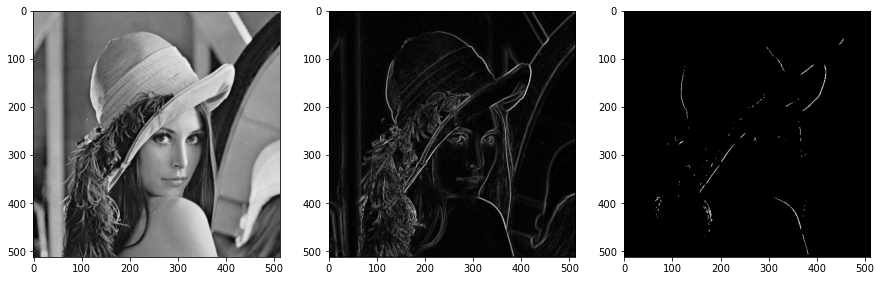

In [19]:
# bw=value1>0.3
bw=edge>0.3

plt.figure(figsize=(15,15))
plt.subplot(1,3,1);plt.imshow(gray,'gray')
plt.subplot(1,3,2);plt.imshow(edge,'gray')
plt.subplot(1,3,3);plt.imshow(bw,'gray')

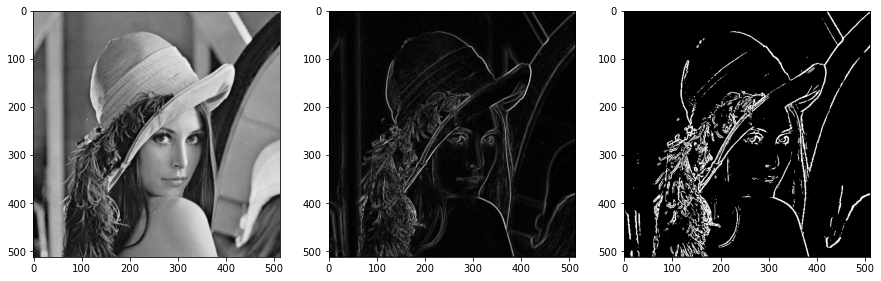

In [20]:
bw=value1>0.1

plt.figure(figsize=(15,15))
plt.subplot(1,3,1);plt.imshow(gray,'gray')
plt.subplot(1,3,2);plt.imshow(edge,'gray')
plt.subplot(1,3,3);plt.imshow(bw,'gray')

In [21]:
# Custom filter

In [22]:
def myDisplay(x,y):
    plt.subplot(1,2,1),plt.imshow(x)
    plt.subplot(1,2,2),plt.imshow(y)

In [26]:
# Custom kernel

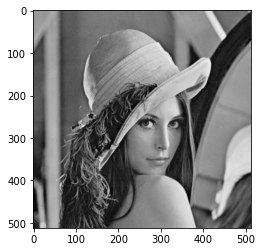

In [27]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# img = cv2.imread('opencv_logo.png')

image = cv2.imread(r"ch_0/lena.png") # this is read in BGR format
# img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)# this converts it into RGB
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)# this converts it into RGB
plt.imshow(img,cmap='gray')

In [28]:
kernel=(np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32))/9 # Gy

print(kernel)

[[ 0.11111111  0.22222222  0.11111111]
 [ 0.          0.          0.        ]
 [-0.11111111 -0.22222222 -0.11111111]]


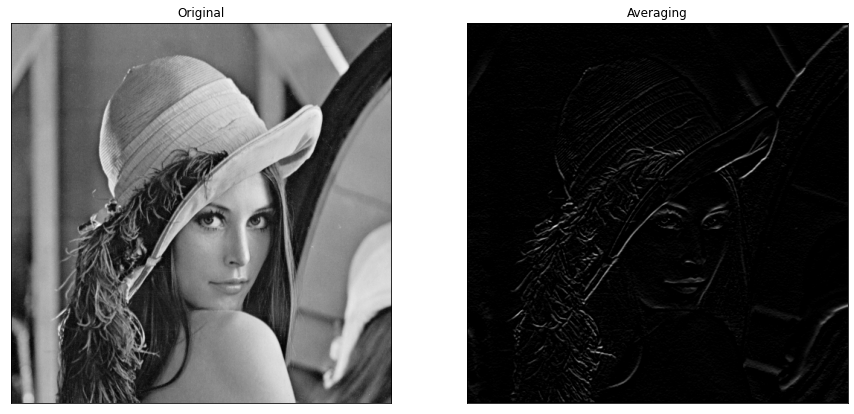

In [29]:
dst1 = cv2.filter2D(img,-1,kernel)
# dst1 = cv2.filter2D(image,-1,kernel)
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst1,cmap='gray'),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

In [30]:
kernel=(np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]], np.float32))/9 # Gx
print(kernel)

[[ 0.11111111  0.         -0.11111111]
 [ 0.22222222  0.         -0.22222222]
 [ 0.11111111  0.         -0.11111111]]


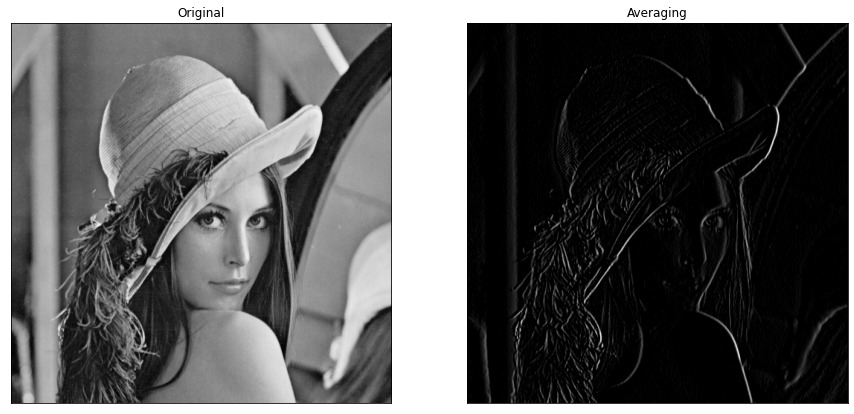

In [31]:
dst2 = cv2.filter2D(img,-1,kernel)
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst2,cmap='gray'),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

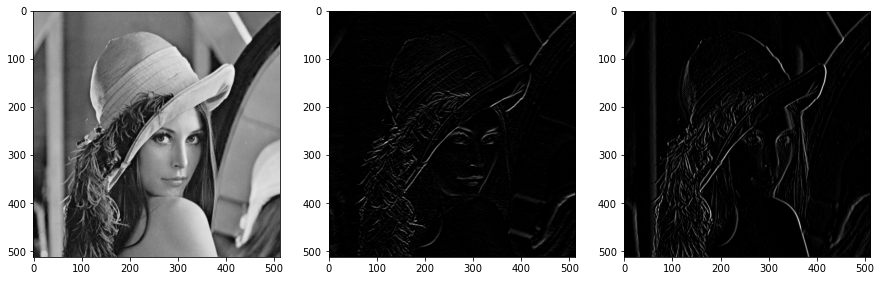

In [32]:
plt.figure(figsize=(15,15))
plt.subplot(1,3,1);plt.imshow(gray,'gray')
plt.subplot(1,3,2);plt.imshow(dst1,'gray')
plt.subplot(1,3,3);plt.imshow(dst2,'gray')

In [ ]:
blur = cv2.blur(img,(5,5))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# blur = cv2.GaussianBlur(img,(5,5),0)

In [ ]:
# median = cv2.medianBlur(img,5)